In [1]:
%load_ext autoreload
%autoreload 2

In [102]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import u

plt.rcParams["figure.figsize"] = (15, 5)

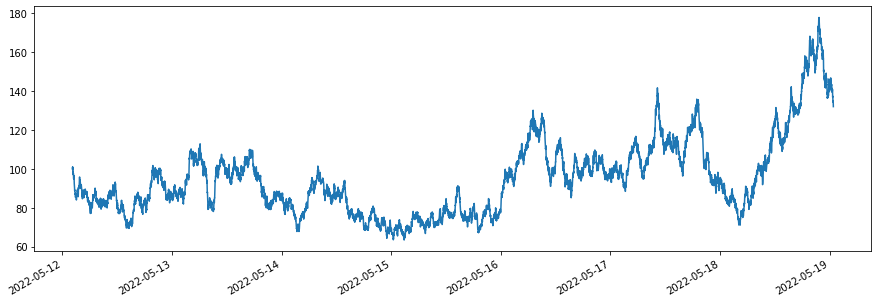

<AxesSubplot:>

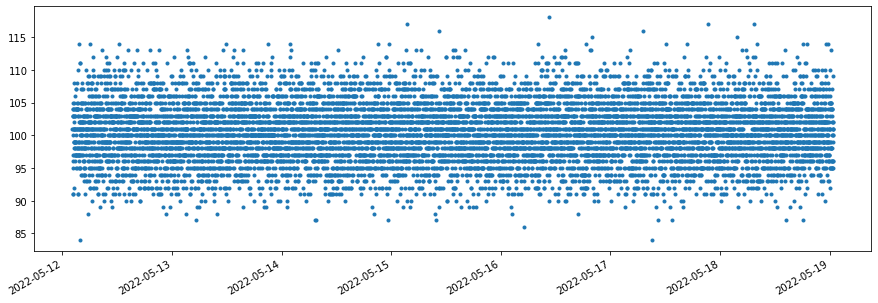

In [3]:
data = u.create_price_data(theta=0.0005, start_price=100, n_samples=10000)
data = u.add_volume_data(data, var=20)

data["close"].plot.line()
plt.show()
data["volume"].plot(style='.')

In [97]:
def create_bar_indices(data: pd.DataFrame, thres: float, name: str):
    indices = np.full(len(data.index), False, dtype=bool)
    csum = 0.
    for e, (_, r) in enumerate(data.iterrows()):
        if csum >= thres:
            csum = 0.
            indices[e] = True
        csum += r[name]
    return indices

def group_bars(data, indices):
    groups = data.reset_index().groupby(dv_indices.cumsum())
    bars = dv_group[["volume"]].sum()
    return groups, bars

def get_bars(group):
    groups, bars = group
    bars.set_index(groups["index"].first(), inplace=True)
    return bars 

def with_dv(group):
    groups, bars = group
    bars["dv"] = groups["dv"].sum()
    return groups, bars

def with_open(group):
    groups, bars = group
    bars["open"] = groups["close"].first()
    return groups, bars
    
def with_low(group):
    groups, bars = group
    bars["low"] = groups["close"].min()
    return groups, bars 
    
def with_high(group):
    groups, bars = group
    bars["high"] = groups["close"].max()
    return groups, bars 
    
def with_close(group):
    groups, bars = group
    bars["close"] = groups["close"].last()
    return groups, bars

# Dollar Bars

In [17]:
data["dv"] = data["close"] * data["volume"]

In [34]:
mean_hourly_dv = np.mean(data.resample("H")["dv"].sum())
mean_hourly_dv

572337.3880838323

In [100]:
dv_indices = create_bar_indices(data, mean_hourly_dv, "dv")
g = group_bars(data, dv_indices)
g = with_dv(g)
g = with_open(g)
g = with_close(g)
g = with_high(g)
g = with_low(g)
dv_bars = get_bars(g)
dv_bars.head()

,volume,dv,open,close,high,low
index,,,,,,
2022-05-12 02:11:30.853132,6332.0,577668.69,100.00,87.42,100.98,83.98
2022-05-12 03:14:30.853132,6414.0,580433.86,88.07,86.63,95.81,85.68
2022-05-12 04:18:30.853132,6614.0,576824.52,87.41,85.37,89.49,84.60
2022-05-12 05:24:30.853132,7046.0,574167.47,86.58,80.57,86.58,77.03
2022-05-12 06:34:30.853132,6776.0,580778.92,80.56,82.19,90.08,80.56


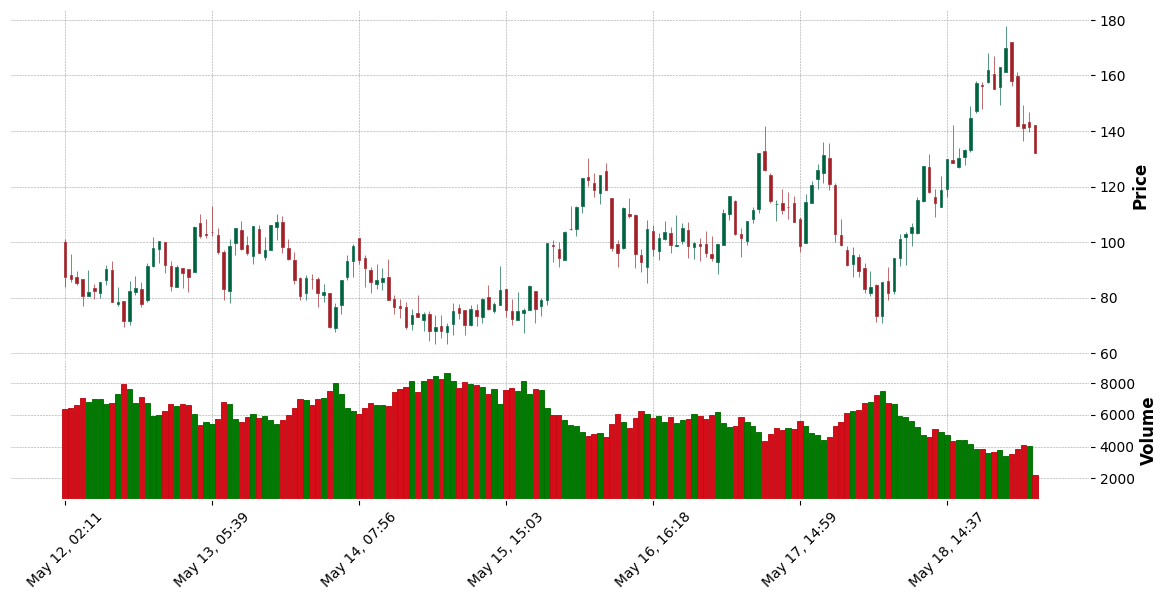

In [106]:
mplf.plot(dv_bars, type="candle", style="charles", figsize=(15,7), volume=True)